# 3 Linear Regression
Based on book "Introduction to Statitical Learning" by Tibshirani & Hastie
Data in book avaliable from https://github.com/JWarmenhoven/ISLR-python/tree/master/Notebooks/Data

#### Contents:
* [3.1 Simple Linear Regression](#3.1)
    * [3.1.1 Estimating the Coefficients](#3.1.1)
    * [3.1.2 Assessing the Accuracy of the Coefficient Estimates](#3.1.2)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm

import statsmodels.api as sm
import statsmodels.formula.api as smf

## 3.1 Simple Linear Regression <a class="anchor" id="3.1"></a>
\begin{equation}
Y \approx \beta_0 +\beta_1X
\end{equation}
where $Y$ is the *response* variable and $X$ is the *predictor* variable. Here $\beta_0$ and $\beta_1$ are two unknown constants (known as the model *coefficients* or *parameters*) that represent the *intercept* and *slope* terms in the linear model.

Once we have used the training data to produce estimates $\hat{\beta_0}$ and $\hat{\beta_1}$, we can predict $\hat{y}$ using $x$ by computing
\begin{equation}
\hat{y} = \hat{\beta_0} +\hat{\beta_1}x
\end{equation}


The following example advertising dataset we want to model the response of sales in relation to the amount of TV advertising:
\begin{equation}
sales \approx \beta_0 +\beta_1TV
\end{equation}

In [2]:
# get advertising dataset
advertising_data_url=r'https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv'
df=pd.read_csv(advertising_data_url,index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### 3.1.1 Estimating the Coefficients <a class="anchor" id="3.1.1"></a>

We want the linear model to fit the training data as *close* as possible. We do this by calculating $\hat{\beta_0}$ and $\hat{\beta_1}$ such that they minimise the *least-squares* criterion. The *residual sum of squares* (RSS) is defined as
\begin{equation}
RSS=e_1^2+e_2^2+\cdots+e_n^2
\end{equation}
where $e_i$ is the error in the model for the ith data point (\\( e_i = y_i - \hat{y_i}\\)) and $n$ is the number of data points in the training dataset.

It can be shown that there is an analytical solution:
\begin{equation}
\hat{\beta_1}=\frac{\sum_{i=1}^n{(x_i-\bar{x})(y_i-\bar{y})}}{\sum_{i=1}^n{(x_i-\bar{x})^2}},\\
\hat{\beta_0}=\bar{y}=\hat{\beta_1}\bar{x}.
\end{equation}
Therefore, for the advertising dataset we get the following:

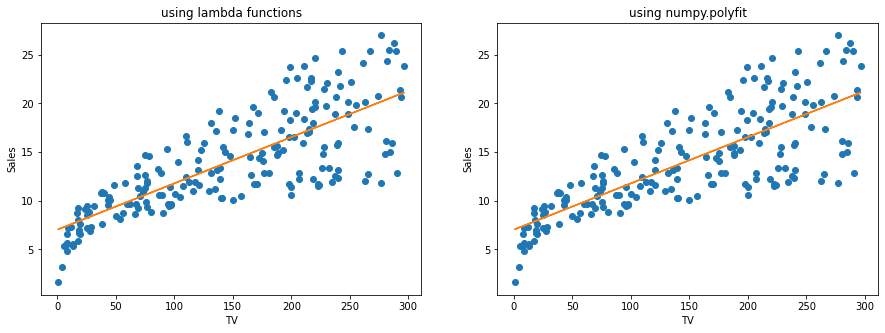

In [3]:
# define the above functions
beta_1_fun = lambda x,y: ((x-x.mean())*(y-y.mean())).sum() / ((x-x.mean())**2).sum()
beta_0_fun = lambda x,y: y.mean() - beta_1_fun(x,y)*x.mean()

# define x and y
x=df['TV']
y=df['Sales']
beta_0, beta_1 = beta_0_fun(x,y), beta_1_fun(x,y)

# this can also be done in one line:
beta_1_np, beta_0_np = np.polyfit(x, y, 1)

# plot comparison
n_plots=2
fig, ax = plt.subplots(1,n_plots,figsize=(15,5))
for i in range(n_plots):
    ax[i].plot(x, y, 'o')
    ax[i].set_xlabel('TV')
    ax[i].set_ylabel('Sales')
ax[0].set_title('using lambda functions')
ax[0].plot(x, beta_0 + beta_1*x)
ax[1].set_title('using numpy.polyfit')
ax[1].plot(x, beta_0_np + beta_1_np*x);

The model shows that an additional $1000 spent on TV advertising will see an additional 47.5 sales


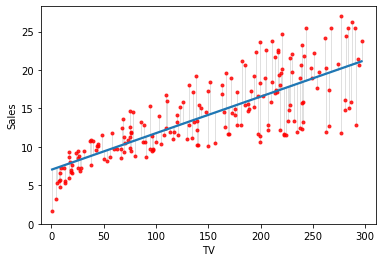

In [4]:
# seaborn automatically plots a ployfit line of any order if you want to look quickly at the relationship
sns.regplot(df.TV, df.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(ymin=0);

# add joing vertical lines if you want:
for i in range(df.shape[0]):
    plt.plot([df.TV.iloc[i],df.TV.iloc[i]],[df.Sales.iloc[i],beta_0 + beta_1*df.TV.iloc[i]],color='#e0e0e0',linewidth=1, zorder=0)

print('The model shows that an additional $1000 spent on TV advertising will see an additional {:0.1f} sales'.format(beta_1*1000))

To show how the RSS varies for a linear model of order=1:

minimum RSS is 2.10


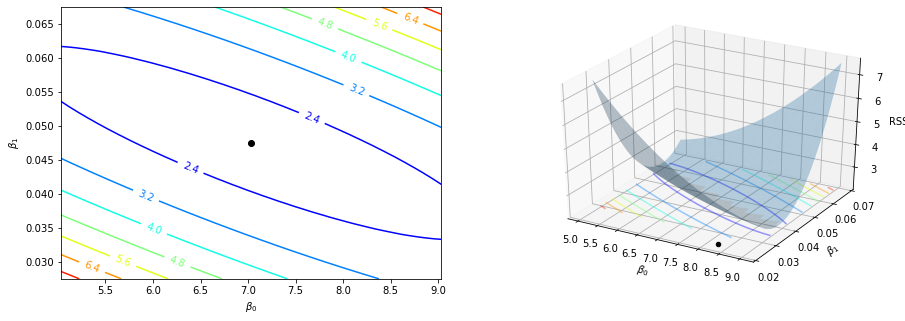

In [5]:
def make_RSS_plots(beta_0,beta_1,x,y):
    # Create grid coordinates for plotting
    B0 = np.linspace(beta_0-2, beta_0+2, 50)
    B1 = np.linspace(beta_1-0.02, beta_1+0.02, 50)
    xx, yy = np.meshgrid(B0, B1, indexing='xy')
    Z = np.zeros((B0.size,B1.size))

    # Calculate Z-values (RSS) based on grid of coefficients
    for (i,j),_ in np.ndenumerate(Z):
        Z[i,j] =((y - (xx[i,j]+x*yy[i,j]))**2).sum()/1000
    print('minimum RSS is {:0.2f}'.format(Z.min()))
    
    # make left figure a contour plot
    fig = plt.figure(figsize=(15,5))
    ax1=fig.add_subplot(1,2,1)
    CS=ax1.contour(xx, yy, Z, cmap=plt.cm.jet)
    ax1.scatter(beta_0, beta_1, c='k')
    ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
    ax1.set_xlabel(r'$\beta_0$')
    ax1.set_ylabel(r'$\beta_1$')
    # make right figure a surface over a contour plot
    ax2=fig.add_subplot(1,2,2,projection='3d')
    ax2.projection='3d'
    ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
    ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.jet,
                alpha=0.4)
    ax2.scatter3D(beta_0, beta_1, c='k')
    ax2.set_zlabel('RSS')
    ax2.set_zlim(Z.min(),Z.max())
    ax2.set_ylim(0.02,0.07)
    ax2.set_xlabel(r'$\beta_0$')
    ax2.set_ylabel(r'$\beta_1$')

    
make_RSS_plots(beta_0,beta_1,x,y)

**Centered vs Uncentered**

The previous example was uncentered, however if we rescale the x-axis around the x mean, we still get the same gradient, however a different intercept, and the RSS graphs look more visually appealing.

When **NOT** to use centering (https://www.theanalysisfactor.com/when-not-to-center-a-predictor-variable-in-regression/):
1. If all continuous predictors have a meaningful value of 0.

2. If you have no interaction terms involving that predictor.

3. And if there are no values that are particularly meaningful.


Centering can be done easily in the scikit-learn module:

minimum RSS is 2.10


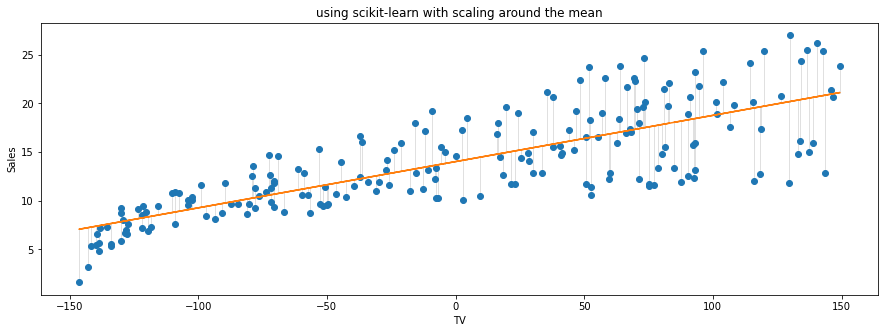

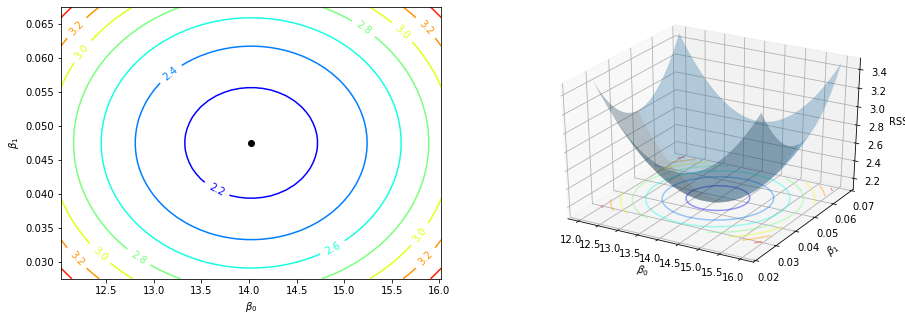

In [6]:
#define linear model
regr = skl_lm.LinearRegression()
# scale the x data
X_centering = scale(df.TV, with_mean=True, with_std=False).reshape(-1,1)
# X_no_centering = df.TV.to_numpy().reshape(-1, 1)
y = df.Sales

# fit the model
regr.fit(X_centering,y)

# plot scatter
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(X_centering,y,'o')
ax.set_xlabel('TV')
ax.set_ylabel('Sales')
ax.set_title('using scikit-learn with scaling around the mean')
ax.plot(X_centering, regr.intercept_ + regr.coef_[0]*X_centering);
# add joing vertical lines if you want:
for i in range(df.shape[0]):
    plt.plot([X_centering[i],X_centering[i]],[y.iloc[i],regr.intercept_ + regr.coef_[0]*X_centering[i]],color='#e0e0e0',linewidth=1, zorder=0)


# plot RSS plots
make_RSS_plots(regr.intercept_,regr.coef_[0],X_centering.flatten(),y)

### 3.1.2 Assessing the Accuracy of the Coefficient Estimates <a class="anchor" id="3.1.2"></a>
If the true relationship between $X$ and $Y$ is in the form:
\begin{equation}
Y=f(X)+\epsilon,
\end{equation}
then if $f$ is approximated by a linear function, the relationship is:
\begin{equation}
Y=\beta_0+\beta_1X+\epsilon.
\end{equation}


Below, in the left figure, you can see an example of how the population model (<span style="color:red">the red line</span>) \\(Y=2+3X\\) is used to generate 100 random normally distributed points, and how the linear least-squares (<span style="color:green">the green line</span>) fits. Although it is not quite the same as the true relationship, it is a pretty good representation. In the right figure we can see than for 10 different randomly generated sets of points, the linear fits (<span style="color:blue">the blue lines</span>) are a good representation everytime.

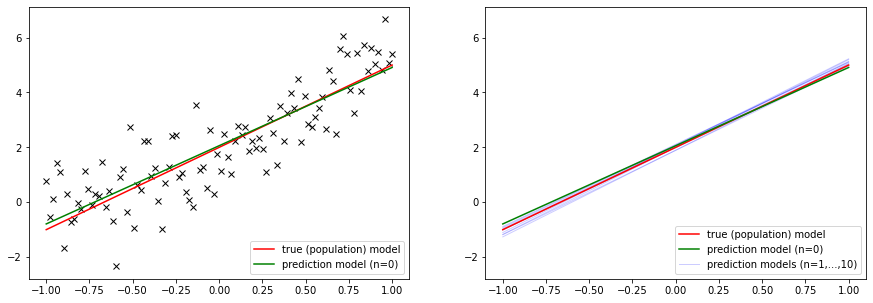

In [7]:
mu=0
sigma=1
n=100
rand_norm = lambda mu, sigma, n: sigma * np.random.randn(n) + mu

# population model
y_pop = lambda x, err: 2+3*x+err

y=[]
err=[]
x=np.linspace(-1,1,n)
for i in range(10):
    np.random.seed(i)
    err.append(rand_norm(mu, sigma, n))
    y.append(y_pop(x,err[i]))
    
    
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(x,y[0],'kx')
ax[0].plot([x.min(),x.max()],y_pop(np.array([x.min(),x.max()]),0),'r')
beta_0, beta_1 = beta_0_fun(x,y[0]), beta_1_fun(x,y[0])
ax[0].plot(x, beta_0 + beta_1*x,'g');

ax[1].set_ylim(ax[0].get_ylim())
h1=ax[1].plot([x.min(),x.max()],y_pop(np.array([x.min(),x.max()]),0),'r')
beta_0, beta_1 = beta_0_fun(x,y[0]), beta_1_fun(x,y[0])
h2=ax[1].plot(x, beta_0 + beta_1*x,'g');
for i in range(1,10):
    beta_0, beta_1 = beta_0_fun(x,y[i]), beta_1_fun(x,y[i])
    h3=ax[1].plot(x, beta_0 + beta_1*x,'b',zorder=0,linewidth=1,alpha=0.2);
ax[0].legend([h1[0],h2[0]],['true (population) model','prediction model (n=0)'],loc=4);
ax[1].legend([h1[0],h2[0],h3[0]],['true (population) model','prediction model (n=0)','prediction models (n=1,...,10)'],loc=4);

In [8]:
print(y[1].mean(),beta_0_fun(x,y[1]))

2.0605828520756986 2.060582852075698


In [9]:
# Table 3.1 in ISLR book
est = smf.ols('Sales ~ TV', df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [49]:
# Table 3.1 in ISLR book
est = smf.ols('Sales ~ TV', df).fit()
est.summary().tables[1]

## 3.1 Simple Linear Regression <a class="anchor" id="3.1"></a>
\begin{equation}
Y \approx \beta_0 +\beta_1X
\end{equation}
where $Y$ is the *response* variable and $X$ is the *predictor* variable. Here $\beta_0$ and $\beta_1$ are two unknown constants (known as the model *coefficients* or *parameters*) that represent the *intercept* and *slope* terms in the linear model.

Once we have used the training data to produce estimates $\hat{\beta_0}$ and $\hat{\beta_1}$, we can predict $\hat{y}$ using $x$ by computing
\begin{equation}
\hat{y} = \hat{\beta_0} +\hat{\beta_1}x
\end{equation}


The following example advertising dataset we want to model the response of sales in relation to the amount of TV advertising:
\begin{equation}
sales \approx \beta_0 +\beta_1TV
\end{equation}

In [50]:
# get advertising dataset
advertising_data_url=r'https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv'
df=pd.read_csv(advertising_data_url,index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### 3.1.1 Estimating the Coefficients <a class="anchor" id="3.1.1"></a>

We want the linear model to fit the training data as *close* as possible. We do this by calculating $\hat{\beta_0}$ and $\hat{\beta_1}$ such that they minimise the *least-squares* criterion. The *residual sum of squares* (RSS) is defined as
\begin{equation}
RSS=e_1^2+e_2^2+\cdots+e_n^2
\end{equation}
where $e_i$ is the error in the model for the ith data point (\\( e_i = y_i - \hat{y_i}\\)) and $n$ is the number of data points in the training dataset.

It can be shown that there is an analytical solution:
\begin{equation}
\hat{\beta_1}=\frac{\sum_{i=1}^n{(x_i-\bar{x})(y_i-\bar{y})}}{\sum_{i=1}^n{(x_i-\bar{x})^2}},\\
\hat{\beta_0}=\bar{y}=\hat{\beta_1}\bar{x}.
\end{equation}
Therefore, for the advertising dataset we get the following:

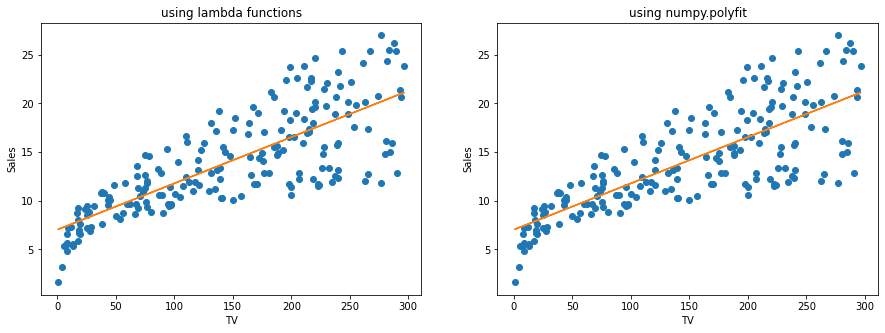

In [51]:
# define the above functions
beta_1_fun = lambda x,y: ((x-x.mean())*(y-y.mean())).sum() / ((x-x.mean())**2).sum()
beta_0_fun = lambda x,y: y.mean() - beta_1_fun(x,y)*x.mean()

# define x and y
x=df['TV']
y=df['Sales']
beta_0, beta_1 = beta_0_fun(x,y), beta_1_fun(x,y)

# this can also be done in one line:
beta_1_np, beta_0_np = np.polyfit(x, y, 1)

# plot comparison
n_plots=2
fig, ax = plt.subplots(1,n_plots,figsize=(15,5))
for i in range(n_plots):
    ax[i].plot(x, y, 'o')
    ax[i].set_xlabel('TV')
    ax[i].set_ylabel('Sales')
ax[0].set_title('using lambda functions')
ax[0].plot(x, beta_0 + beta_1*x)
ax[1].set_title('using numpy.polyfit')
ax[1].plot(x, beta_0_np + beta_1_np*x);

The model shows that an additional $1000 spent on TV advertising will see an additional 47.5 sales


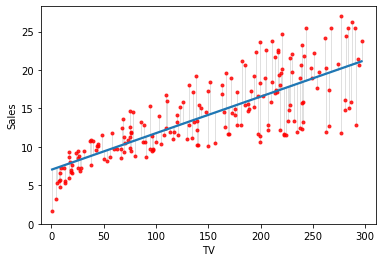

In [52]:
# seaborn automatically plots a ployfit line of any order if you want to look quickly at the relationship
sns.regplot(df.TV, df.Sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(ymin=0);

# add joing vertical lines if you want:
for i in range(df.shape[0]):
    plt.plot([df.TV.iloc[i],df.TV.iloc[i]],[df.Sales.iloc[i],beta_0 + beta_1*df.TV.iloc[i]],color='#e0e0e0',linewidth=1, zorder=0)

print('The model shows that an additional $1000 spent on TV advertising will see an additional {:0.1f} sales'.format(beta_1*1000))

To show how the RSS varies for a linear model of order=1:

minimum RSS is 2.10


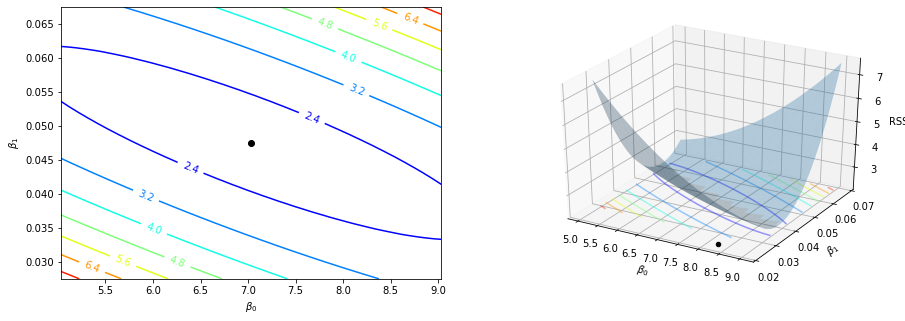

In [53]:
def make_RSS_plots(beta_0,beta_1,x,y):
    # Create grid coordinates for plotting
    B0 = np.linspace(beta_0-2, beta_0+2, 50)
    B1 = np.linspace(beta_1-0.02, beta_1+0.02, 50)
    xx, yy = np.meshgrid(B0, B1, indexing='xy')
    Z = np.zeros((B0.size,B1.size))

    # Calculate Z-values (RSS) based on grid of coefficients
    for (i,j),_ in np.ndenumerate(Z):
        Z[i,j] =((y - (xx[i,j]+x*yy[i,j]))**2).sum()/1000
    print('minimum RSS is {:0.2f}'.format(Z.min()))
    
    # make left figure a contour plot
    fig = plt.figure(figsize=(15,5))
    ax1=fig.add_subplot(1,2,1)
    CS=ax1.contour(xx, yy, Z, cmap=plt.cm.jet)
    ax1.scatter(beta_0, beta_1, c='k')
    ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')
    ax1.set_xlabel(r'$\beta_0$')
    ax1.set_ylabel(r'$\beta_1$')
    # make right figure a surface over a contour plot
    ax2=fig.add_subplot(1,2,2,projection='3d')
    ax2.projection='3d'
    ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
    ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.jet,
                alpha=0.4)
    ax2.scatter3D(beta_0, beta_1, c='k')
    ax2.set_zlabel('RSS')
    ax2.set_zlim(Z.min(),Z.max())
    ax2.set_ylim(0.02,0.07)
    ax2.set_xlabel(r'$\beta_0$')
    ax2.set_ylabel(r'$\beta_1$')

    
make_RSS_plots(beta_0,beta_1,x,y)

**Centered vs Uncentered**

The previous example was uncentered, however if we rescale the x-axis around the x mean, we still get the same gradient, however a different intercept, and the RSS graphs look more visually appealing.

When **NOT** to use centering (https://www.theanalysisfactor.com/when-not-to-center-a-predictor-variable-in-regression/):
1. If all continuous predictors have a meaningful value of 0.

2. If you have no interaction terms involving that predictor.

3. And if there are no values that are particularly meaningful.


Centering can be done easily in the scikit-learn module:

minimum RSS is 2.10


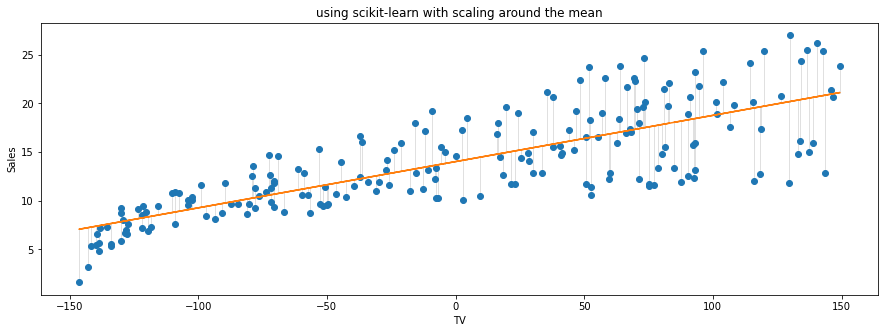

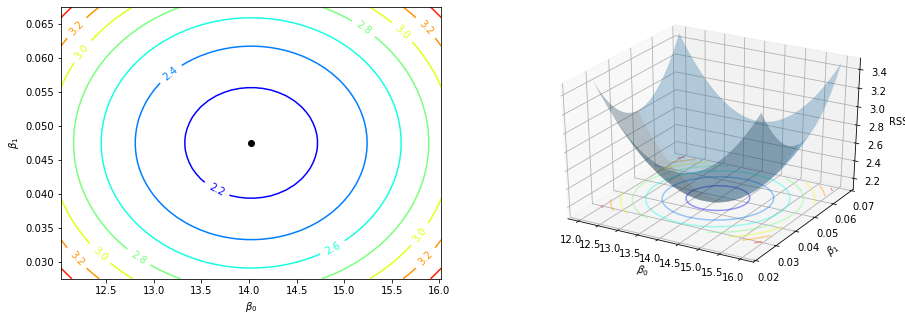

In [54]:
#define linear model
regr = skl_lm.LinearRegression()
# scale the x data
X_centering = scale(df.TV, with_mean=True, with_std=False).reshape(-1,1)
# X_no_centering = df.TV.to_numpy().reshape(-1, 1)
y = df.Sales

# fit the model
regr.fit(X_centering,y)

# plot scatter
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(X_centering,y,'o')
ax.set_xlabel('TV')
ax.set_ylabel('Sales')
ax.set_title('using scikit-learn with scaling around the mean')
ax.plot(X_centering, regr.intercept_ + regr.coef_[0]*X_centering);
# add joing vertical lines if you want:
for i in range(df.shape[0]):
    plt.plot([X_centering[i],X_centering[i]],[y.iloc[i],regr.intercept_ + regr.coef_[0]*X_centering[i]],color='#e0e0e0',linewidth=1, zorder=0)


# plot RSS plots
make_RSS_plots(regr.intercept_,regr.coef_[0],X_centering.flatten(),y)

### 3.1.2 Assessing the Accuracy of the Coefficient Estimates <a class="anchor" id="3.1.2"></a>
If the true relationship between $X$ and $Y$ is in the form:
\begin{equation}
Y=f(X)+\epsilon,
\end{equation}
then if $f$ is approximated by a linear function, the relationship is:
\begin{equation}
Y=\beta_0+\beta_1X+\epsilon.
\end{equation}


Below, in the left figure, you can see an example of how the population model (<span style="color:red">the red line</span>) \\(Y=2+3X\\) is used to generate 100 random normally distributed points, and how the linear least-squares (<span style="color:green">the green line</span>) fits. Although it is not quite the same as the true relationship, it is a pretty good representation. In the right figure we can see than for 10 different randomly generated sets of points, the linear fits (<span style="color:blue">the blue lines</span>) are a good representation everytime.

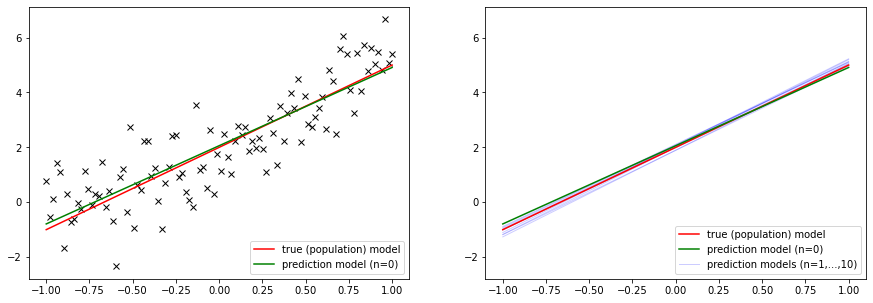

In [68]:
mu=0
sigma=1
n=100
rand_norm = lambda mu, sigma, n: sigma * np.random.randn(n) + mu

# population model
y_pop = lambda x, err: 2+3*x+err

y=[]
err=[]
x=np.linspace(-1,1,n)
for i in range(10):
    np.random.seed(i)
    err.append(rand_norm(mu, sigma, n))
    y.append(y_pop(x,err[i]))
    
    
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(x,y[0],'kx')
ax[0].plot([x.min(),x.max()],y_pop(np.array([x.min(),x.max()]),0),'r')
beta_0, beta_1 = beta_0_fun(x,y[0]), beta_1_fun(x,y[0])
ax[0].plot(x, beta_0 + beta_1*x,'g');

ax[1].set_ylim(ax[0].get_ylim())
h1=ax[1].plot([x.min(),x.max()],y_pop(np.array([x.min(),x.max()]),0),'r')
beta_0, beta_1 = beta_0_fun(x,y[0]), beta_1_fun(x,y[0])
h2=ax[1].plot(x, beta_0 + beta_1*x,'g');
for i in range(1,10):
    beta_0, beta_1 = beta_0_fun(x,y[i]), beta_1_fun(x,y[i])
    h3=ax[1].plot(x, beta_0 + beta_1*x,'b',zorder=0,linewidth=1,alpha=0.2);
ax[0].legend([h1[0],h2[0]],['true (population) model','prediction model (n=0)'],loc=4);
ax[1].legend([h1[0],h2[0],h3[0]],['true (population) model','prediction model (n=0)','prediction models (n=1,...,10)'],loc=4);

In [70]:
print(y[1].mean(),beta_0_fun(x,y[1]))

2.0605828520756986 2.060582852075698


In [56]:
# Table 3.1 in ISLR book
est = smf.ols('Sales ~ TV', df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053
